In [2]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import BertTokenizerFast, BertModel
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
food_data = pd.read_csv("./data/BERT_food_hand.csv")

# 상품(음식)을 설명하는 문장

In [4]:
food_data

,음식,효능
0,감,스트레스를 완화하고 혈관을 청소하며 피부미용에 좋다
1,밤,소화를 돕고 변비를 개선하고 뼈를 튼튼히 하며 뇌 건강을 돕는다
2,김,소화를 돕고 노화를 방지하며 심혈관 건강에 도움이 되다
3,미나리,해독 작용을 하며 혈액을 정화하고 변비를 개선한다
4,토마토,피로 회복에 좋고 스트레스를 해소하고 에너지를 증진시킨다
5,참외,피로 회복에 좋고 수분을 공급하며 암 예방에 도움이 된다
6,딸기,심혈관 건강에 도움이 되고 염증을 완화하며 기억력에 도움을 준다
7,미역,노폐물을 배출하며 변비를 개선하고 뼈를 튼튼하게 한다
8,석류,피부 노화를 방지하며 혈액 순환을 돕고 스트레스를 완화한다
9,귤,피부 미용에 좋고 변비를 개선하며 스트레스를 해소한다


# 차원을 설명하는 문장

In [5]:
dim_data = pd.read_csv("./data/BERT_dims.csv")

In [6]:
dim_data

,차원,설명
0,에너지,신체에 활력을 불어넣고 활동적이고 열정적이게 한다
1,회복,약해진 몸과 마음을 쉬게 하여 건강한 상태로 복구시킨다
2,순환,호흡과 소화를 활성화하고 영양과 산소 및 에너지를 공급한다
3,정화,잡념과 노폐물을 제거하여 몸과 마음을 깨끗하게 한다


In [7]:
tokenizer = BertTokenizerFast.from_pretrained("kykim/bert-kor-base")
model = BertModel.from_pretrained("kykim/bert-kor-base")

Some weights of the model checkpoint at kykim/bert-kor-base were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


# BERT 모델을 사용해서 문장의 유사도 확인
현재 bert의 per-train의 output을 mean_pooling을 이용해서 sent vector로 바꾼 후 유사도를 계산하는 방식

In [8]:
def word_sim(sent1 , sent2):
    words = [sent1, sent2]
    tokens = {'input_ids' : [] , 'attention_mask' : []}

    for word in words:
        print(word)
        encoded = tokenizer.encode(word)
        #print(tokenizer.convert_ids_to_tokens(encoded))
        print('토큰의 수 : {} , 토큰화된 문장 {}'.format(len(encoded)-2,tokenizer.convert_ids_to_tokens(encoded)))
        new_tokens = tokenizer.encode_plus(word , max_length=128, truncation= True , padding='max_length' , return_tensors='pt')
        tokens['input_ids'].append(new_tokens['input_ids'][0])
        tokens['attention_mask'].append(new_tokens['attention_mask'][0])
        
    tokens['input_ids'] = torch.stack(tokens['input_ids'])
    tokens['attention_mask'] = torch.stack(tokens['attention_mask'])
    
    outputs = model(**tokens)
    embeddings = outputs.last_hidden_state
    attention_mask = tokens['attention_mask']
    mask = attention_mask.unsqueeze(-1).expand(embeddings.size()).float()
    masked_embeddings = embeddings * mask
    summed = torch.sum(masked_embeddings,1)
    summed_mask = torch.clamp(mask.sum(1), min=1e-9)
    mean_pooled = summed / summed_mask
    mean_pooled = mean_pooled.detach().numpy()
    return cosine_similarity( mean_pooled[0].reshape(1,-1) , mean_pooled[1].reshape(1,-1))[0][0]

In [9]:
act_dim = pd.DataFrame(columns = ['에너지','회복','순환','정화'], index = food_data['음식'])

## 수치화를 진행하면서 token의 수와 tokenize가 잘 되는 지 확인

In [10]:
e_est = []
e_sents = dim_data['설명'][0]
for idx in food_data.index:
    print("food : " + food_data['음식'][idx])
    e_est.append(word_sim(e_sents,food_data['효능'][idx]))
    print('\n')
act_dim['에너지'] = e_est

food : 감
신체에 활력을 불어넣고 활동적이고 열정적이게 한다
토큰의 수 : 11 , 토큰화된 문장 ['[CLS]', '신체', '##에', '활력을', '불어', '##넣고', '활동', '##적이고', '열정', '##적이', '##게', '한다', '[SEP]']
스트레스를 완화하고 혈관을 청소하며 피부미용에 좋다
토큰의 수 : 11 , 토큰화된 문장 ['[CLS]', '스트레스를', '완화', '##하고', '혈관', '##을', '청소', '##하며', '피부', '##미용', '##에', '좋다', '[SEP]']


food : 밤
신체에 활력을 불어넣고 활동적이고 열정적이게 한다
토큰의 수 : 11 , 토큰화된 문장 ['[CLS]', '신체', '##에', '활력을', '불어', '##넣고', '활동', '##적이고', '열정', '##적이', '##게', '한다', '[SEP]']
소화를 돕고 변비를 개선하고 뼈를 튼튼히 하며 뇌 건강을 돕는다
토큰의 수 : 16 , 토큰화된 문장 ['[CLS]', '소화', '##를', '돕고', '변비', '##를', '개선', '##하고', '뼈', '##를', '튼튼', '##히', '하며', '뇌', '건강을', '돕는', '##다', '[SEP]']


food : 김
신체에 활력을 불어넣고 활동적이고 열정적이게 한다
토큰의 수 : 11 , 토큰화된 문장 ['[CLS]', '신체', '##에', '활력을', '불어', '##넣고', '활동', '##적이고', '열정', '##적이', '##게', '한다', '[SEP]']
소화를 돕고 노화를 방지하며 심혈관 건강에 도움이 되다
토큰의 수 : 13 , 토큰화된 문장 ['[CLS]', '소화', '##를', '돕고', '노화', '##를', '방지', '##하며', '심', '##혈관', '건강에', '도움이', '되', '##다', '[SEP]']


food : 미나리
신체에 활력을 불어넣고 활동적이고 열정적이게 한다
토큰의 수 : 11 , 토큰화

In [11]:
h_est = []
h_sents = dim_data['설명'][1]
for idx in food_data.index:
    print("food : " + food_data['음식'][idx])
    h_est.append(word_sim(h_sents,food_data['효능'][idx]))
    print('\n')
act_dim['회복'] = h_est

food : 감
약해진 몸과 마음을 쉬게 하여 건강한 상태로 복구시킨다
토큰의 수 : 11 , 토큰화된 문장 ['[CLS]', '약', '##해진', '몸과', '마음을', '쉬', '##게', '하여', '건강한', '상태로', '복구', '##시킨다', '[SEP]']
스트레스를 완화하고 혈관을 청소하며 피부미용에 좋다
토큰의 수 : 11 , 토큰화된 문장 ['[CLS]', '스트레스를', '완화', '##하고', '혈관', '##을', '청소', '##하며', '피부', '##미용', '##에', '좋다', '[SEP]']


food : 밤
약해진 몸과 마음을 쉬게 하여 건강한 상태로 복구시킨다
토큰의 수 : 11 , 토큰화된 문장 ['[CLS]', '약', '##해진', '몸과', '마음을', '쉬', '##게', '하여', '건강한', '상태로', '복구', '##시킨다', '[SEP]']
소화를 돕고 변비를 개선하고 뼈를 튼튼히 하며 뇌 건강을 돕는다
토큰의 수 : 16 , 토큰화된 문장 ['[CLS]', '소화', '##를', '돕고', '변비', '##를', '개선', '##하고', '뼈', '##를', '튼튼', '##히', '하며', '뇌', '건강을', '돕는', '##다', '[SEP]']


food : 김
약해진 몸과 마음을 쉬게 하여 건강한 상태로 복구시킨다
토큰의 수 : 11 , 토큰화된 문장 ['[CLS]', '약', '##해진', '몸과', '마음을', '쉬', '##게', '하여', '건강한', '상태로', '복구', '##시킨다', '[SEP]']
소화를 돕고 노화를 방지하며 심혈관 건강에 도움이 되다
토큰의 수 : 13 , 토큰화된 문장 ['[CLS]', '소화', '##를', '돕고', '노화', '##를', '방지', '##하며', '심', '##혈관', '건강에', '도움이', '되', '##다', '[SEP]']


food : 미나리
약해진 몸과 마음을 쉬게 하여 건강한 상태로 복구시킨다
토큰의 수 : 11 , 

In [12]:
c_est = []
c_sents = dim_data['설명'][2]
for idx in food_data.index:
    print("food : " + food_data['음식'][idx])
    c_est.append(word_sim(c_sents,food_data['효능'][idx]))
    print('\n')
act_dim['순환'] = c_est

food : 감
호흡과 소화를 활성화하고 영양과 산소 및 에너지를 공급한다
토큰의 수 : 13 , 토큰화된 문장 ['[CLS]', '호흡', '##과', '소화', '##를', '활성화', '##하고', '영양', '##과', '산소', '및', '에너지를', '공급', '##한다', '[SEP]']
스트레스를 완화하고 혈관을 청소하며 피부미용에 좋다
토큰의 수 : 11 , 토큰화된 문장 ['[CLS]', '스트레스를', '완화', '##하고', '혈관', '##을', '청소', '##하며', '피부', '##미용', '##에', '좋다', '[SEP]']


food : 밤
호흡과 소화를 활성화하고 영양과 산소 및 에너지를 공급한다
토큰의 수 : 13 , 토큰화된 문장 ['[CLS]', '호흡', '##과', '소화', '##를', '활성화', '##하고', '영양', '##과', '산소', '및', '에너지를', '공급', '##한다', '[SEP]']
소화를 돕고 변비를 개선하고 뼈를 튼튼히 하며 뇌 건강을 돕는다
토큰의 수 : 16 , 토큰화된 문장 ['[CLS]', '소화', '##를', '돕고', '변비', '##를', '개선', '##하고', '뼈', '##를', '튼튼', '##히', '하며', '뇌', '건강을', '돕는', '##다', '[SEP]']


food : 김
호흡과 소화를 활성화하고 영양과 산소 및 에너지를 공급한다
토큰의 수 : 13 , 토큰화된 문장 ['[CLS]', '호흡', '##과', '소화', '##를', '활성화', '##하고', '영양', '##과', '산소', '및', '에너지를', '공급', '##한다', '[SEP]']
소화를 돕고 노화를 방지하며 심혈관 건강에 도움이 되다
토큰의 수 : 13 , 토큰화된 문장 ['[CLS]', '소화', '##를', '돕고', '노화', '##를', '방지', '##하며', '심', '##혈관', '건강에', '도움이', '되', '##다', '[SEP]']


food : 

In [13]:
p_est = []
p_sents = dim_data['설명'][3]
for idx in food_data.index:
    print("food : " + food_data['음식'][idx])
    p_est.append(word_sim(p_sents,food_data['효능'][idx]))
    print('\n')
act_dim['정화'] = p_est

food : 감
잡념과 노폐물을 제거하여 몸과 마음을 깨끗하게 한다
토큰의 수 : 10 , 토큰화된 문장 ['[CLS]', '잡', '##념', '##과', '노폐물을', '제거', '##하여', '몸과', '마음을', '깨끗하게', '한다', '[SEP]']
스트레스를 완화하고 혈관을 청소하며 피부미용에 좋다
토큰의 수 : 11 , 토큰화된 문장 ['[CLS]', '스트레스를', '완화', '##하고', '혈관', '##을', '청소', '##하며', '피부', '##미용', '##에', '좋다', '[SEP]']


food : 밤
잡념과 노폐물을 제거하여 몸과 마음을 깨끗하게 한다
토큰의 수 : 10 , 토큰화된 문장 ['[CLS]', '잡', '##념', '##과', '노폐물을', '제거', '##하여', '몸과', '마음을', '깨끗하게', '한다', '[SEP]']
소화를 돕고 변비를 개선하고 뼈를 튼튼히 하며 뇌 건강을 돕는다
토큰의 수 : 16 , 토큰화된 문장 ['[CLS]', '소화', '##를', '돕고', '변비', '##를', '개선', '##하고', '뼈', '##를', '튼튼', '##히', '하며', '뇌', '건강을', '돕는', '##다', '[SEP]']


food : 김
잡념과 노폐물을 제거하여 몸과 마음을 깨끗하게 한다
토큰의 수 : 10 , 토큰화된 문장 ['[CLS]', '잡', '##념', '##과', '노폐물을', '제거', '##하여', '몸과', '마음을', '깨끗하게', '한다', '[SEP]']
소화를 돕고 노화를 방지하며 심혈관 건강에 도움이 되다
토큰의 수 : 13 , 토큰화된 문장 ['[CLS]', '소화', '##를', '돕고', '노화', '##를', '방지', '##하며', '심', '##혈관', '건강에', '도움이', '되', '##다', '[SEP]']


food : 미나리
잡념과 노폐물을 제거하여 몸과 마음을 깨끗하게 한다
토큰의 수 : 10 , 토큰화된 문장 ['[CLS]', '잡', 

# 상품(음식) - 차원에 대한 유사도 확인

In [14]:
dim_data

,차원,설명
0,에너지,신체에 활력을 불어넣고 활동적이고 열정적이게 한다
1,회복,약해진 몸과 마음을 쉬게 하여 건강한 상태로 복구시킨다
2,순환,호흡과 소화를 활성화하고 영양과 산소 및 에너지를 공급한다
3,정화,잡념과 노폐물을 제거하여 몸과 마음을 깨끗하게 한다


In [15]:
food_data

,음식,효능
0,감,스트레스를 완화하고 혈관을 청소하며 피부미용에 좋다
1,밤,소화를 돕고 변비를 개선하고 뼈를 튼튼히 하며 뇌 건강을 돕는다
2,김,소화를 돕고 노화를 방지하며 심혈관 건강에 도움이 되다
3,미나리,해독 작용을 하며 혈액을 정화하고 변비를 개선한다
4,토마토,피로 회복에 좋고 스트레스를 해소하고 에너지를 증진시킨다
5,참외,피로 회복에 좋고 수분을 공급하며 암 예방에 도움이 된다
6,딸기,심혈관 건강에 도움이 되고 염증을 완화하며 기억력에 도움을 준다
7,미역,노폐물을 배출하며 변비를 개선하고 뼈를 튼튼하게 한다
8,석류,피부 노화를 방지하며 혈액 순환을 돕고 스트레스를 완화한다
9,귤,피부 미용에 좋고 변비를 개선하며 스트레스를 해소한다


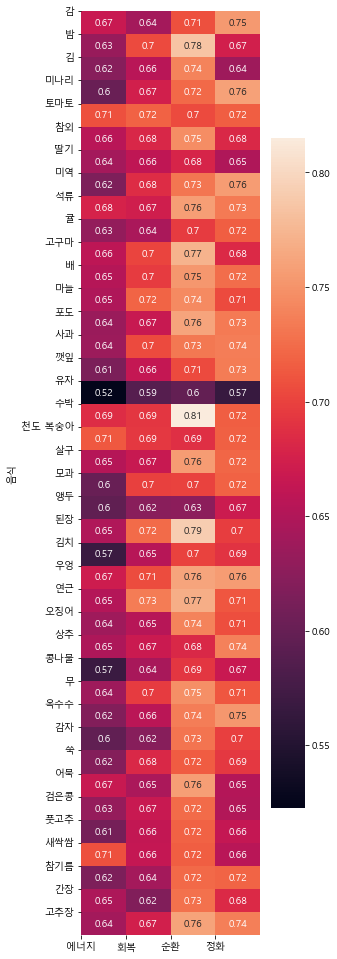

In [16]:
plt.rc('font', family='Malgun Gothic')

action_list = food_data['음식']
dim_list = ['에너지','회복','순환','정화']

fig = plt.figure(figsize=(4,17))
fig.set_facecolor('white')
#plt.title(f'{act_name}에서 단어들간의 유사도 확인')
sns.heatmap(act_dim,cbar=True,annot=True)
plt.xticks(np.arange(len(dim_list)),dim_list)
plt.yticks(np.arange(len(action_list)),action_list)
plt.show()


* 나중에 보고 변경  

|action|설명(행동의 설명하는 문장을 보고 차원과 직접 매핑)|타당?|
|--|--|--|
|명상|(몸을 이완 -> 회복) , (마음을 안정 -> 정화)|타당|  
|산책|(순환 키워드/혈액 순환 , 순환) , (창의성/상쾌하게, 에너지,정화)|타당|
|등산|(정화 키워드, 정화) (몸을 튼튼,회복)|타당|
샤워|(노폐물 제거 , 정화) , (혈액순환 , 순환)|타당|
|수영|(근력 향샹/체중관리 , 회복)|애매|
|조깅|(심페기능 강화, 회복/순화) , (스트레스 해소, 정화)|애매|
|자전거 타기|(심폐기능, 순환/회복) , (관절/근력 강화, 회복) , (스트레스,정화)|애매|
|요가|(유연성/힘 상승, 회복) , (스트레스 해소/정화)|애매|
|스트레칭|(회복 키워드 , 회복), (혈액 순환 , 순환)|타당|
|여행|(행복감/창의성, 에너지) , (기분전환,정화/에너지)|타당|


In [17]:
act_dim

,에너지,회복,순환,정화
음식,,,,
감,0.666508,0.641452,0.708666,0.753271
밤,0.633528,0.704162,0.784813,0.673356
김,0.621959,0.655270,0.739479,0.636993
미나리,0.601556,0.674237,0.722462,0.759553
토마토,0.707944,0.718563,0.704246,0.716075
참외,0.655225,0.680863,0.745633,0.681911
딸기,0.641999,0.660473,0.678057,0.649189
미역,0.615473,0.684914,0.730576,0.756489
석류,0.677111,0.673122,0.757356,0.733245


C:\Users\fd\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\fd\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


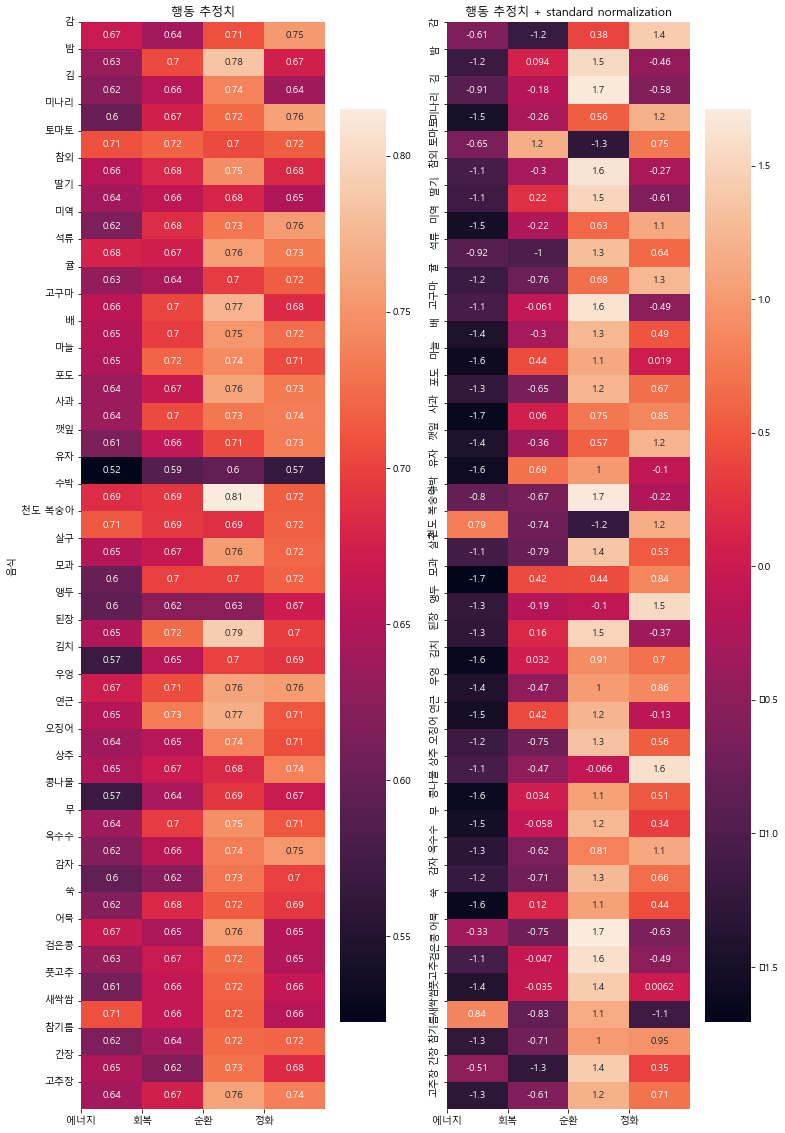

In [18]:
# 현재 행동 추정치를 standard normalization
from sklearn.preprocessing import StandardScaler

std_est = []
for idx in act_dim.index:
    scaler = StandardScaler()
    act_est = np.array(act_dim.loc[idx]).reshape(-1,1)
    scaler.fit(act_est)
    std_act_est = scaler.transform(act_est).reshape(1,4).flatten()
    std_est.append(std_act_est)

plt.rc('font', family='Malgun Gothic')
f,(ax1,ax2) = plt.subplots(1,2)
f.set_figheight(20)
f.set_figwidth(12)
action_list = food_data['음식']
dim_list = ['에너지','회복','순환','정화']

g1 = sns.heatmap(act_dim,cbar=True,annot=True , ax=ax1)
ax1.set_title('행동 추정치')
ax1.set_yticks(np.arange(0,len(action_list)))
ax1.set_yticklabels(action_list)
ax1.set_xticks(np.arange(0,len(dim_list)))
ax1.set_xticklabels(dim_list)

g2 = sns.heatmap(std_est,cbar=True,annot=True, ax=ax2)
ax2.set_title('행동 추정치 + standard normalization')
ax2.set_yticks(np.arange(0,len(action_list)))
ax2.set_yticklabels(action_list)
ax2.set_xticks(np.arange(0,len(dim_list)))
ax2.set_xticklabels(dim_list)
#ax2.set_ylabel(rotation= 90)

plt.show()

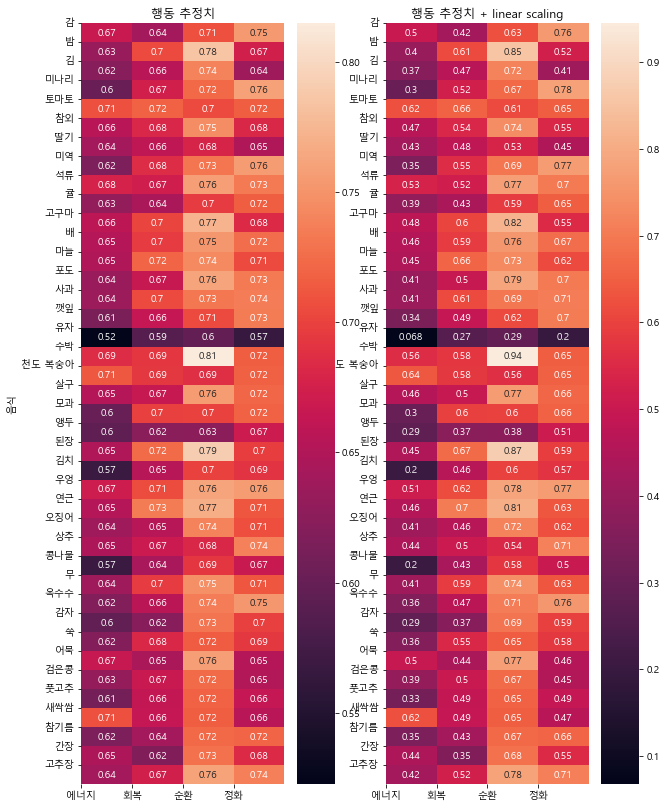

In [26]:
# 현재 행동 추정치를 linear scaling ( 2 * est - 0.7)
lin_est = []
for idx in act_dim.index:
    act_est = np.array(act_dim.loc[idx])
    std = np.std(act_est)
    nor_act_est =  (3 * act_est) - 1.5
    lin_est.append(nor_act_est)

plt.rc('font', family='Malgun Gothic')
f,(ax1,ax2) = plt.subplots(1,2)
f.set_figheight(14)
f.set_figwidth(10)
action_list = food_data['음식']
dim_list = ['에너지','회복','순환','정화']

g1 = sns.heatmap(act_dim,cbar=True,annot=True , ax=ax1)
ax1.set_title('행동 추정치')
ax1.set_yticks(np.arange(0,len(action_list)))
ax1.set_yticklabels(action_list)
ax1.set_xticks(np.arange(0,len(dim_list)))
ax1.set_xticklabels(dim_list)

g2 = sns.heatmap(lin_est,cbar=True,annot=True, ax=ax2)
ax2.set_title('행동 추정치 + linear scaling')
ax2.set_yticks(np.arange(0,len(action_list)))
ax2.set_yticklabels(action_list ,  rotation=0)
ax2.set_xticks(np.arange(0,len(dim_list)))
ax2.set_xticklabels(dim_list)

plt.show()

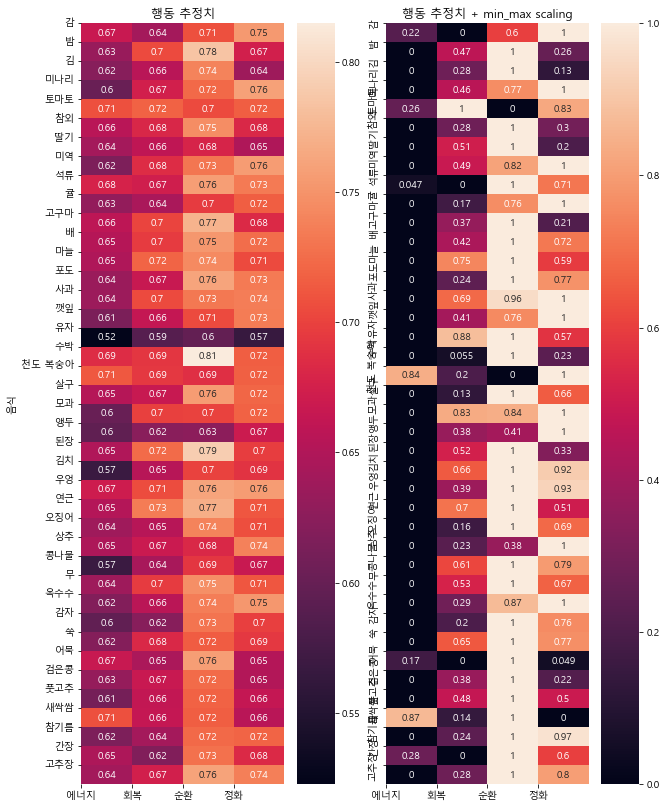

In [20]:
from sklearn.preprocessing import MinMaxScaler

min_max_est = []
for idx in act_dim.index:
    scaler = MinMaxScaler()
    act_est = np.array(act_dim.loc[idx]).reshape(-1,1)
    scaler.fit(act_est)
    normal_act_est = scaler.transform(act_est).reshape(1,4).flatten()
    min_max_est.append(normal_act_est)

plt.rc('font', family='Malgun Gothic')
f,(ax1,ax2) = plt.subplots(1,2)
f.set_figheight(14)
f.set_figwidth(10)
action_list = food_data['음식']
dim_list = ['에너지','회복','순환','정화']

g1 = sns.heatmap(act_dim,cbar=True,annot=True , ax=ax1)
ax1.set_title('행동 추정치')
ax1.set_yticks(np.arange(0,len(action_list)))
ax1.set_yticklabels(action_list)
ax1.set_xticks(np.arange(0,len(dim_list)))
ax1.set_xticklabels(dim_list)

g2 = sns.heatmap(min_max_est,cbar=True,annot=True, ax=ax2)
ax2.set_title('행동 추정치 + min_max scaling')
ax2.set_yticks(np.arange(0,len(action_list)))
ax2.set_yticklabels(action_list)
ax2.set_xticks(np.arange(0,len(dim_list)))
ax2.set_xticklabels(dim_list)

plt.show()

C:\Users\fd\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\fd\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


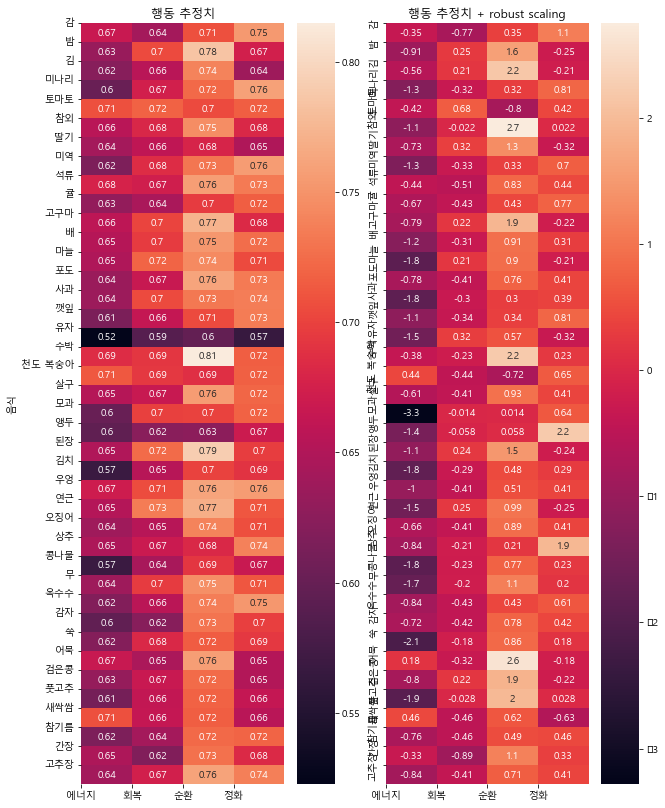

In [21]:
from sklearn.preprocessing import robust_scale

rob_est = []
for idx in act_dim.index:
    act_est = np.array(act_dim.loc[idx]).reshape(-1,1)
    scaler = robust_scale(act_est)
    normal_act_est = np.array(scaler.tolist()).flatten()
    rob_est.append(normal_act_est)

plt.rc('font', family='Malgun Gothic')
f,(ax1,ax2) = plt.subplots(1,2)
f.set_figheight(14)
f.set_figwidth(10)
action_list = food_data['음식']
dim_list = ['에너지','회복','순환','정화']

g1 = sns.heatmap(act_dim,cbar=True,annot=True , ax=ax1)
ax1.set_title('행동 추정치')
ax1.set_yticks(np.arange(0,len(action_list)))
ax1.set_yticklabels(action_list)
ax1.set_xticks(np.arange(0,len(dim_list)))
ax1.set_xticklabels(dim_list)

g2 = sns.heatmap(rob_est,cbar=True,annot=True, ax=ax2)
ax2.set_title('행동 추정치 + robust scaling')
ax2.set_yticks(np.arange(0,len(action_list)))
ax2.set_yticklabels(action_list)
ax2.set_xticks(np.arange(0,len(dim_list)))
ax2.set_xticklabels(dim_list)

plt.show()